In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")

### EDA

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
def check_data(df):
    
    print(df.head())
    print(f"\nVeri Seti Boyutu:{df.shape}")
    print(f"\nEksik Veri Sayısı:\n{df.isnull().sum()}")
    print(df.info())
check_data(df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Veri Seti Boyutu:(768, 9)

Eksik Veri Sayısı:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome         

In [5]:
def cat_num_sep(df):
    cat_cols=[]
    num_cols=[]
    cat_cols=[i if df[i].value_counts().count()<15 else num_cols.append(i) for i in df.columns]
    cat_cols=list(set(cat_cols))
    cat_cols.remove(None)
    return cat_cols,num_cols
cat_cols,num_cols=cat_num_sep(df)
print(cat_cols)
print(num_cols)

['Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


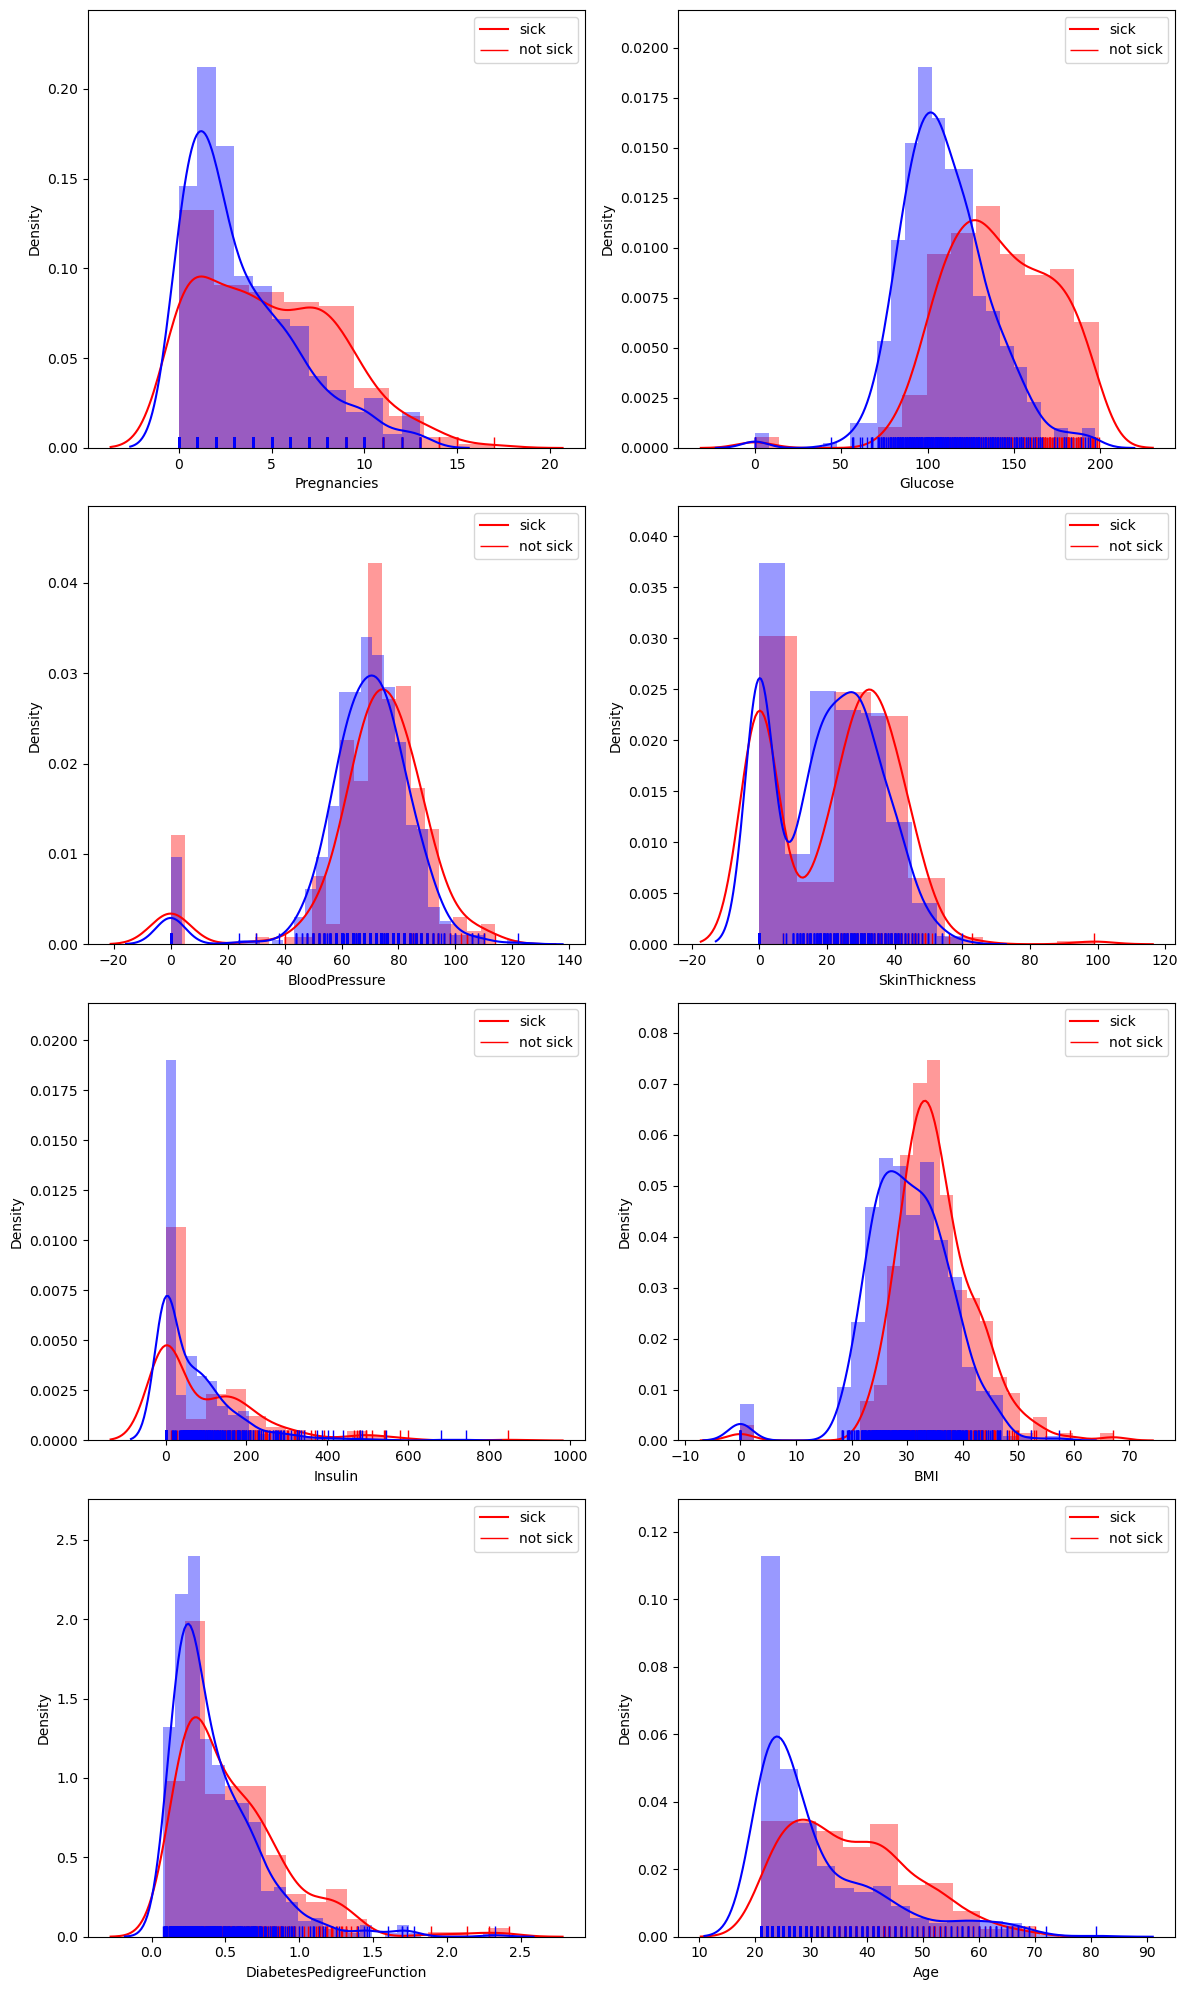

In [6]:
cols=2
rows=4
fig=plt.figure(figsize=(cols*6,rows*5))
for i ,col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.distplot(x=df[col][df.Outcome==1],ax=ax,color="red",rug=True)
    sns.distplot(x=df[col][df.Outcome==0],ax=ax,color="blue",rug=True)
    plt.xlabel(col)
    plt.legend(["sick","not sick"])
fig.tight_layout()
plt.show()

### Insulin,DPF ve Age değişkenleri sağa çarpık iken diğer değişkenler normale daha yakındır.Bu da demek oluyorki saydığım 3 değişken içerisinde aykırı değerler vardır

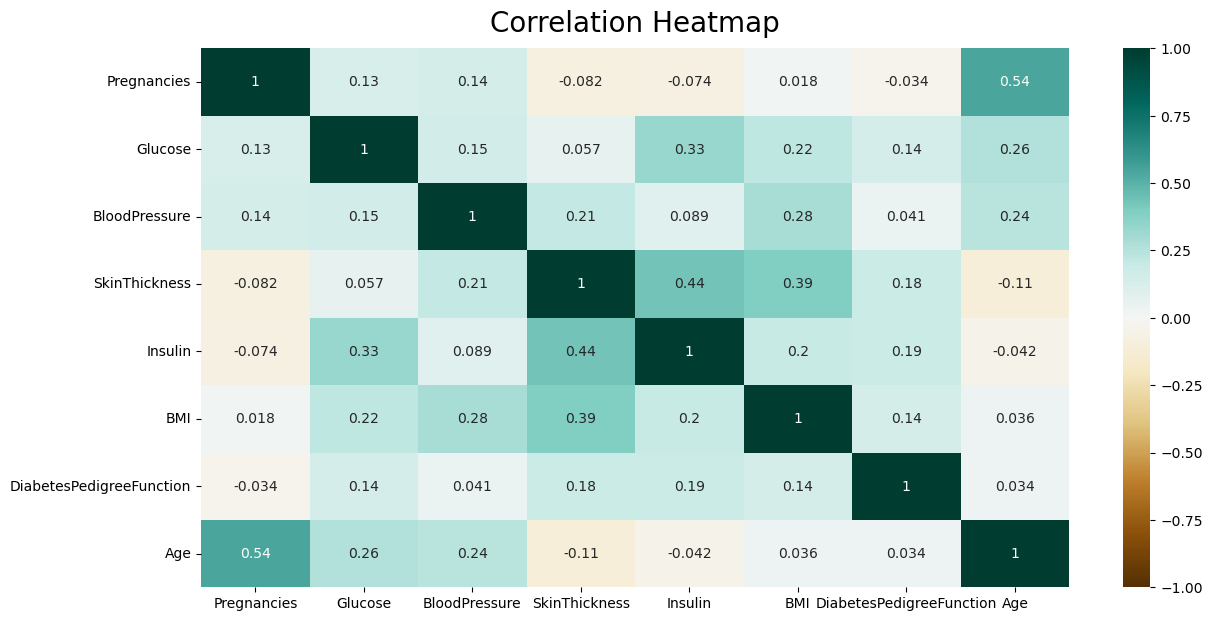

In [7]:
plt.figure(figsize=(14,7))
heatmap=sns.heatmap(df[num_cols].corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG")
heatmap.set_title("Correlation Heatmap",fontdict={"fontsize":20},pad=12);

In [8]:
#Age-Glucose
#Pregancies-Glucose
#Age-Insulin
#Age-Pregnancies
#SkinThickness-Insulin
#BMI-SkinThickness

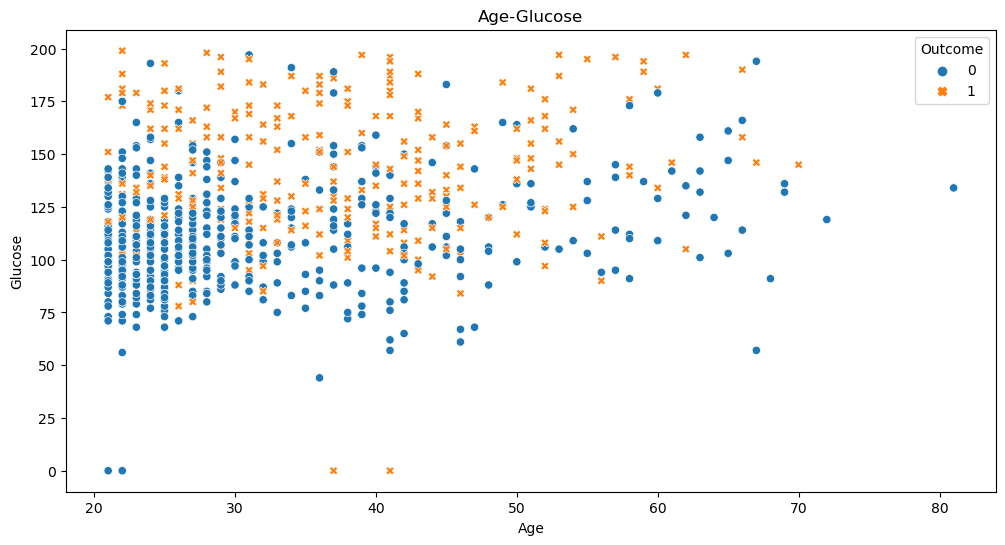

In [9]:
plt.figure(figsize=(12,6))
scatter=sns.scatterplot(data=df,x="Age",y="Glucose",hue="Outcome",style="Outcome",cmap="BrBG")
scatter.set_title("Age-Glucose")
plt.show()

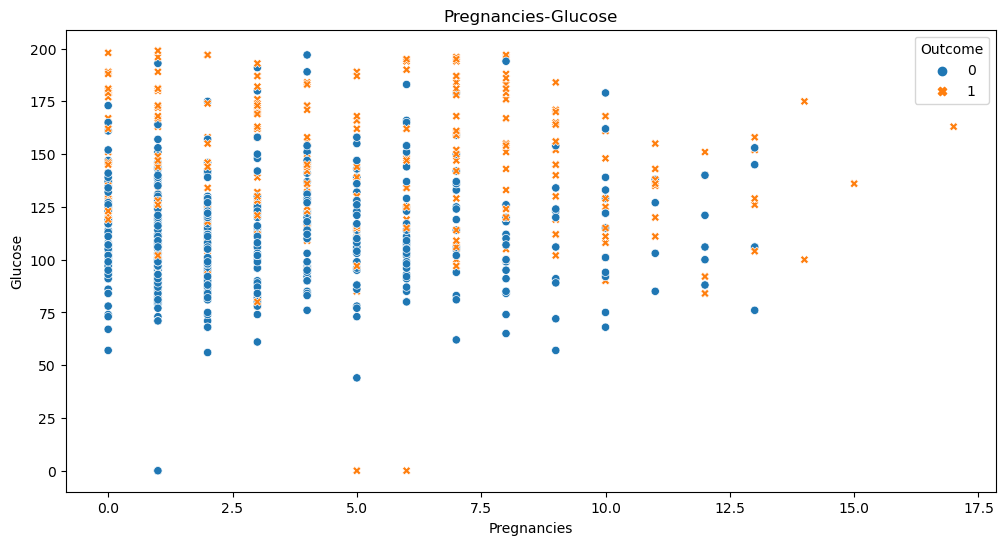

In [10]:
plt.figure(figsize=(12,6))
scatter=sns.scatterplot(data=df,x="Pregnancies",y="Glucose",hue="Outcome",style="Outcome",cmap="BrBG")
scatter.set_title("Pregnancies-Glucose")
plt.show()

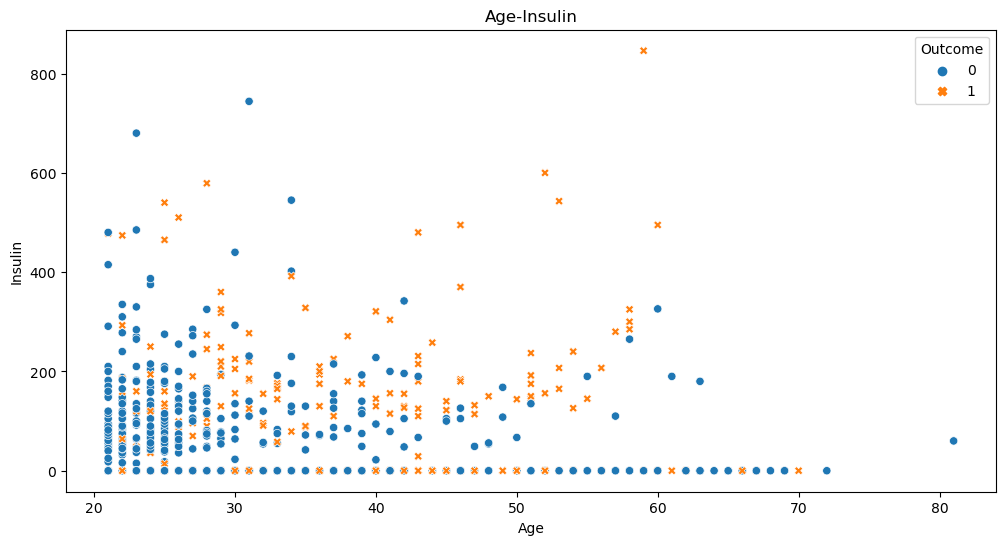

In [11]:
plt.figure(figsize=(12,6))
scatter=sns.scatterplot(data=df,x="Age",y="Insulin",hue="Outcome",style="Outcome",cmap="BrBG")
scatter.set_title("Age-Insulin")
plt.show()

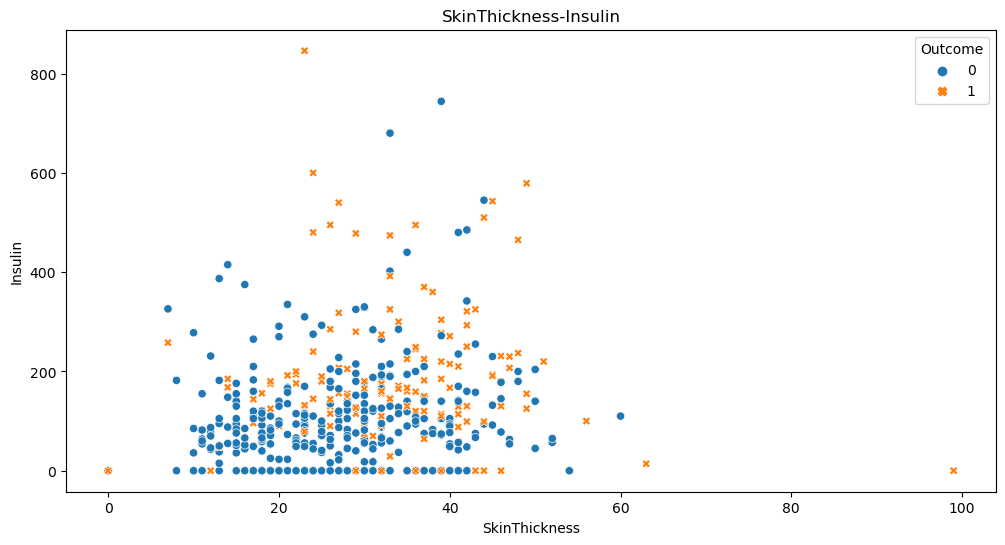

In [12]:
plt.figure(figsize=(12,6))
scatter=sns.scatterplot(data=df,x="SkinThickness",y="Insulin",hue="Outcome",style="Outcome",cmap="BrBG")
scatter.set_title("SkinThickness-Insulin")
plt.show()

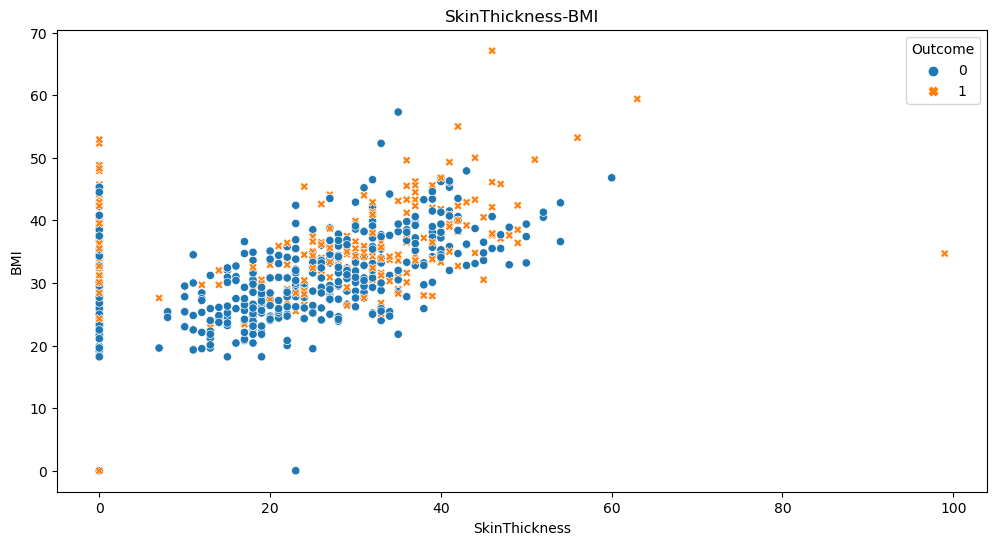

In [13]:
plt.figure(figsize=(12,6))
scatter=sns.scatterplot(data=df,x="SkinThickness",y="BMI",hue="Outcome",style="Outcome",cmap="BrBG")
scatter.set_title("SkinThickness-BMI")
plt.show()

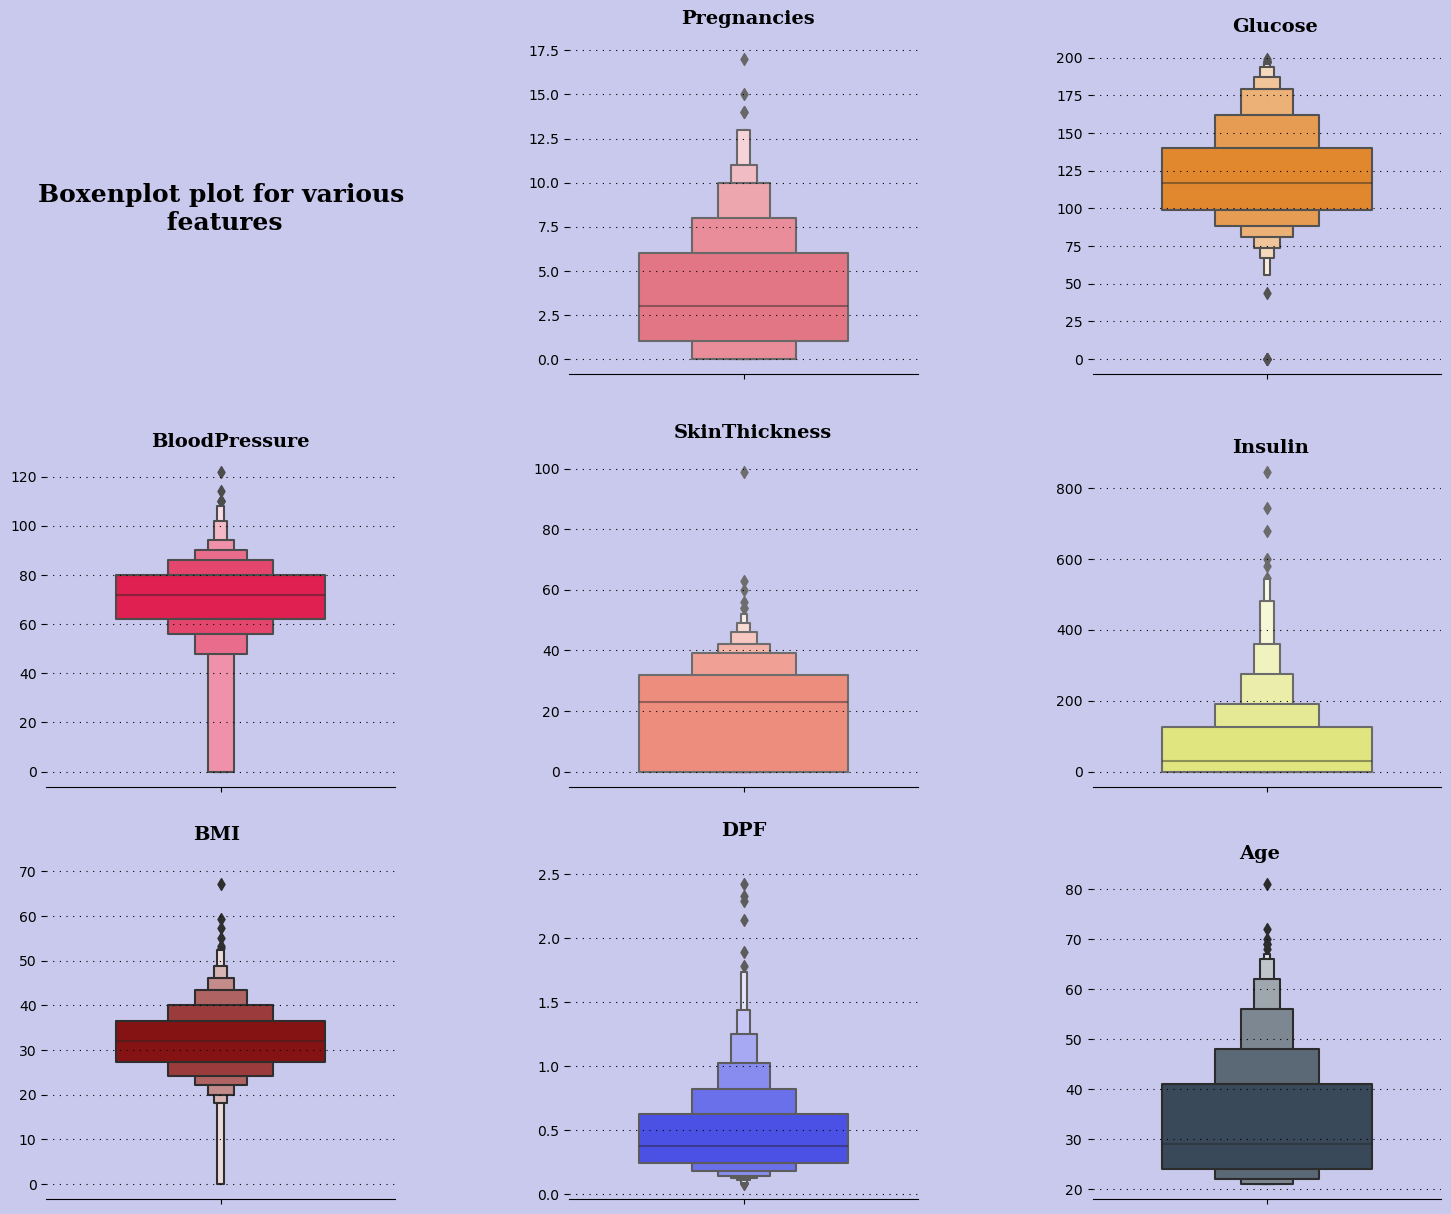

In [14]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxenplot plot for various\n features',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies 
ax1.text(-0.18, 19, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Pregnancies'],palette=["#f56476"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose 
ax2.text(-0.1, 217, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['Glucose'],palette=["#ff8811"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure 
ax3.text(-0.20, 132, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['BloodPressure'],palette=["#ff0040"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness 
ax4.text(-.2, 110, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['SkinThickness'],palette=["#ff7f6c"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin 
ax5.text(-0.10, 900, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Insulin'],palette=["#f0f66e"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI 
ax6.text(-0.08, 77, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,y=df['BMI'],palette=["#990000"],width=0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF 
ax7.text(-0.065, 2.8, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=df['DiabetesPedigreeFunction'],palette=["#3339FF"],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age 
ax8.text(-0.08, 86, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,y=df['Age'],palette=["#34495E"],width=0.6)
ax8.set_xlabel("")
ax8.set_ylabel("")



for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

#### Yukarıda çizilen plotlarda aykırı değerleri görebiliriz

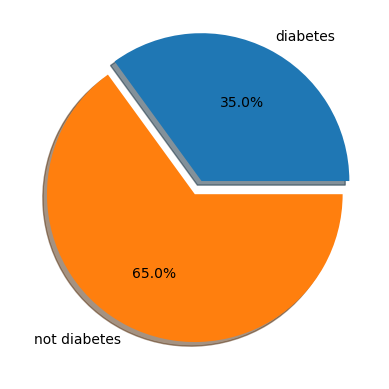

In [15]:
data=[]
data.append(round((len(df[df["Outcome"]==1])*100)/df.shape[0]))
data.append(round((len(df[df["Outcome"]==0])*100)/df.shape[0]))
labels=["diabetes","not diabetes"]
data=np.array(data)
explode=[0.1,0]
plt.pie(data,labels=labels,explode=explode,shadow=True,autopct="%1.1f%%")
plt.show()

#### Pier chartta görüldüğü üzere target değişkeninde dengesizlik bulunmaktadır.İleri ki aşamalarda bu durumun üstesinden gelinecektir.

## Feature Engineering

In [16]:
median_bmi = df['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
df['BMI'] = df['BMI'].replace(
    to_replace=0, value=median_bmi)
median_bloodp = df['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
df['BloodPressure'] = df['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

# Calculate the median value for PlGlcConc
median_plglcconc = df['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
df['Glucose'] = df['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

# Calculate the median value for SkinThick
median_skinthick = df['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df['SkinThickness'] = df['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

# Calculate the median value for SkinThick
median_skinthick = df['Insulin'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df['Insulin'] = df['Insulin'].replace(
    to_replace=0, value=median_skinthick)

In [17]:
df["INSULIN_araligi"]=["normal" if i>=16 and i<=166 else "anormal" for i in df.Insulin]
df["yas_araligi"]=["ergen" if i>=0 and i<18 else "genç" if i>=18 and i<40 else "genç-yaşlı" if i>=40 and i<65 else "yaşlı" if i>=65 and i<84 else "çok yaşlı" for i in df.Age]
df["BMI_araligi"]=["zayıf" if i<=18.5 else "normal" if i>18.5 and i<=24.9 else "kilolu" if i>=25.0 and i<=29.9 else "obez" for i in df.BMI]

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,INSULIN_araligi,yas_araligi,BMI_araligi
0,6,148,72,35,30.5,33.6,0.627,50,1,normal,genç-yaşlı,obez
1,1,85,66,29,30.5,26.6,0.351,31,0,normal,genç,kilolu
2,8,183,64,23,30.5,23.3,0.672,32,1,normal,genç,normal
3,1,89,66,23,94.0,28.1,0.167,21,0,normal,genç,kilolu
4,0,137,40,35,168.0,43.1,2.288,33,1,anormal,genç,obez


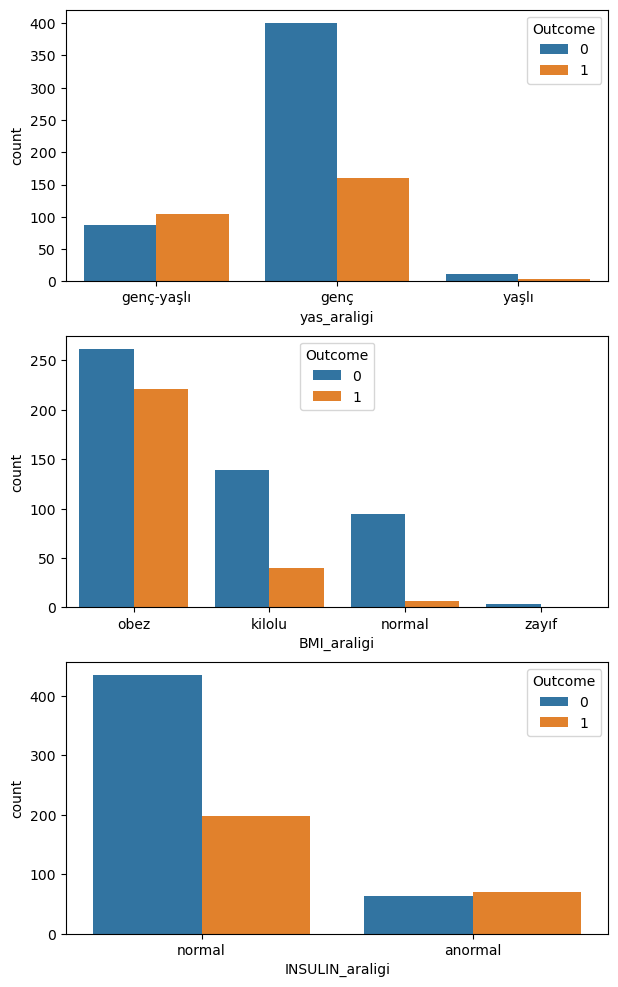

In [19]:
plt.figure(figsize=(7,12))
plt.subplot(3,1,1)
sns.countplot(df.yas_araligi,hue=df.Outcome)
plt.subplot(3,1,2)
sns.countplot(df.BMI_araligi,hue=df.Outcome)
plt.subplot(3,1,3)
sns.countplot(df.INSULIN_araligi,hue=df.Outcome)
plt.show()

In [20]:
df2=df.copy()

### Data Preprocessing

In [21]:
dumm_features=pd.get_dummies(df[["yas_araligi","BMI_araligi","INSULIN_araligi"]])
df.drop(columns=["yas_araligi","BMI_araligi","INSULIN_araligi"],inplace=True)
new=pd.concat([df,dumm_features],axis=1)
new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,yas_araligi_genç,yas_araligi_genç-yaşlı,yas_araligi_yaşlı,BMI_araligi_kilolu,BMI_araligi_normal,BMI_araligi_obez,BMI_araligi_zayıf,INSULIN_araligi_anormal,INSULIN_araligi_normal
0,6,148,72,35,30.5,33.6,0.627,50,1,0,1,0,0,0,1,0,0,1
1,1,85,66,29,30.5,26.6,0.351,31,0,1,0,0,1,0,0,0,0,1
2,8,183,64,23,30.5,23.3,0.672,32,1,1,0,0,0,1,0,0,0,1
3,1,89,66,23,94.0,28.1,0.167,21,0,1,0,0,1,0,0,0,0,1
4,0,137,40,35,168.0,43.1,2.288,33,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,0,1,0,0,0,1,0,1,0
764,2,122,70,27,30.5,36.8,0.340,27,0,1,0,0,0,0,1,0,0,1
765,5,121,72,23,112.0,26.2,0.245,30,0,1,0,0,1,0,0,0,0,1
766,1,126,60,23,30.5,30.1,0.349,47,1,0,1,0,0,0,1,0,0,1


In [22]:
xgb=XGBClassifier()
cat=CatBoostClassifier()
lgbm=LGBMClassifier()

#### Veri analizi yaparken gördüğümüz üzere target değişkenimiz dengesiz bir durumdaydı.Bu yanlış tahminlemelere yol açabilir bu yüzden resampling metodlarından biri olan oversamplingi kullanacağım.

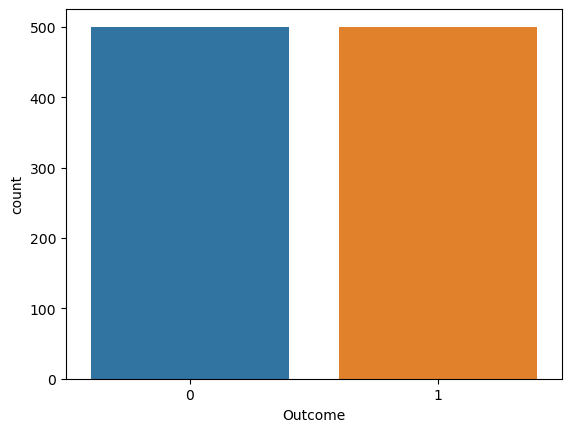

In [23]:
X=new.drop(columns="Outcome")
y=new.Outcome
ros=RandomOverSampler(random_state=0)
X,y=ros.fit_resample(X,y)
sns.countplot(x=y)
plt.show()

In [24]:
new.rename(columns={"yas_araligi_genç-yaşlı":"yas_araligi_genç_yaşlı"},inplace=True)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [26]:
def train_model(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    confusion_matrix(y_test,y_pred)
    print("======================================")
    print(f"Accuracy Score :{accuracy_score(y_test,y_pred)}")
    #imp_df=pd.DataFrame(model.feature_importances_,model.feature_names_)
    #imp_df.sort_values(by=0).plot(kind="barh")

In [27]:
for model in [xgb,lgbm,cat]:
    train_model(X_train,y_train,X_test,y_test,model)

Accuracy Score :0.86
Accuracy Score :0.875
Learning rate set to 0.009366
0:	learn: 0.6893307	total: 138ms	remaining: 2m 17s
1:	learn: 0.6849454	total: 142ms	remaining: 1m 11s
2:	learn: 0.6804858	total: 147ms	remaining: 48.9s
3:	learn: 0.6765548	total: 152ms	remaining: 37.8s
4:	learn: 0.6721088	total: 156ms	remaining: 31.1s
5:	learn: 0.6675882	total: 160ms	remaining: 26.6s
6:	learn: 0.6630920	total: 165ms	remaining: 23.4s
7:	learn: 0.6597211	total: 169ms	remaining: 21s
8:	learn: 0.6555830	total: 174ms	remaining: 19.1s
9:	learn: 0.6517883	total: 179ms	remaining: 17.7s
10:	learn: 0.6482861	total: 184ms	remaining: 16.5s
11:	learn: 0.6450209	total: 189ms	remaining: 15.5s
12:	learn: 0.6411600	total: 194ms	remaining: 14.7s
13:	learn: 0.6386847	total: 198ms	remaining: 14s
14:	learn: 0.6352750	total: 203ms	remaining: 13.3s
15:	learn: 0.6321155	total: 207ms	remaining: 12.7s
16:	learn: 0.6290535	total: 210ms	remaining: 12.1s
17:	learn: 0.6263068	total: 214ms	remaining: 11.7s
18:	learn: 0.6239438	

191:	learn: 0.4060165	total: 569ms	remaining: 2.4s
192:	learn: 0.4053490	total: 572ms	remaining: 2.39s
193:	learn: 0.4045856	total: 574ms	remaining: 2.38s
194:	learn: 0.4040899	total: 576ms	remaining: 2.38s
195:	learn: 0.4036348	total: 578ms	remaining: 2.37s
196:	learn: 0.4032815	total: 580ms	remaining: 2.36s
197:	learn: 0.4028519	total: 582ms	remaining: 2.36s
198:	learn: 0.4022063	total: 584ms	remaining: 2.35s
199:	learn: 0.4016963	total: 586ms	remaining: 2.34s
200:	learn: 0.4011853	total: 587ms	remaining: 2.33s
201:	learn: 0.4008108	total: 589ms	remaining: 2.33s
202:	learn: 0.4004890	total: 591ms	remaining: 2.32s
203:	learn: 0.3999590	total: 593ms	remaining: 2.31s
204:	learn: 0.3995294	total: 595ms	remaining: 2.31s
205:	learn: 0.3989366	total: 597ms	remaining: 2.3s
206:	learn: 0.3985488	total: 599ms	remaining: 2.29s
207:	learn: 0.3979844	total: 601ms	remaining: 2.29s
208:	learn: 0.3974681	total: 603ms	remaining: 2.28s
209:	learn: 0.3967161	total: 605ms	remaining: 2.28s
210:	learn: 0.

397:	learn: 0.3281311	total: 963ms	remaining: 1.46s
398:	learn: 0.3279262	total: 965ms	remaining: 1.45s
399:	learn: 0.3278053	total: 967ms	remaining: 1.45s
400:	learn: 0.3273115	total: 969ms	remaining: 1.45s
401:	learn: 0.3270452	total: 971ms	remaining: 1.44s
402:	learn: 0.3268011	total: 973ms	remaining: 1.44s
403:	learn: 0.3267269	total: 975ms	remaining: 1.44s
404:	learn: 0.3264757	total: 977ms	remaining: 1.43s
405:	learn: 0.3260423	total: 979ms	remaining: 1.43s
406:	learn: 0.3256966	total: 981ms	remaining: 1.43s
407:	learn: 0.3254741	total: 983ms	remaining: 1.43s
408:	learn: 0.3252986	total: 985ms	remaining: 1.42s
409:	learn: 0.3251608	total: 987ms	remaining: 1.42s
410:	learn: 0.3247766	total: 989ms	remaining: 1.42s
411:	learn: 0.3245504	total: 991ms	remaining: 1.41s
412:	learn: 0.3243706	total: 993ms	remaining: 1.41s
413:	learn: 0.3240547	total: 995ms	remaining: 1.41s
414:	learn: 0.3239983	total: 997ms	remaining: 1.41s
415:	learn: 0.3235758	total: 999ms	remaining: 1.4s
416:	learn: 0

600:	learn: 0.2743026	total: 1.35s	remaining: 898ms
601:	learn: 0.2741605	total: 1.35s	remaining: 895ms
602:	learn: 0.2740572	total: 1.35s	remaining: 893ms
603:	learn: 0.2737178	total: 1.36s	remaining: 890ms
604:	learn: 0.2736363	total: 1.36s	remaining: 888ms
605:	learn: 0.2734307	total: 1.36s	remaining: 885ms
606:	learn: 0.2731464	total: 1.36s	remaining: 883ms
607:	learn: 0.2729772	total: 1.36s	remaining: 880ms
608:	learn: 0.2727547	total: 1.37s	remaining: 878ms
609:	learn: 0.2724364	total: 1.37s	remaining: 875ms
610:	learn: 0.2721904	total: 1.37s	remaining: 873ms
611:	learn: 0.2721069	total: 1.37s	remaining: 870ms
612:	learn: 0.2720349	total: 1.37s	remaining: 868ms
613:	learn: 0.2718789	total: 1.38s	remaining: 866ms
614:	learn: 0.2716216	total: 1.38s	remaining: 863ms
615:	learn: 0.2714843	total: 1.38s	remaining: 861ms
616:	learn: 0.2713594	total: 1.38s	remaining: 858ms
617:	learn: 0.2710603	total: 1.38s	remaining: 856ms
618:	learn: 0.2708267	total: 1.39s	remaining: 853ms
619:	learn: 

795:	learn: 0.2339956	total: 1.74s	remaining: 446ms
796:	learn: 0.2338511	total: 1.74s	remaining: 444ms
797:	learn: 0.2337353	total: 1.74s	remaining: 442ms
798:	learn: 0.2335948	total: 1.75s	remaining: 439ms
799:	learn: 0.2334159	total: 1.75s	remaining: 437ms
800:	learn: 0.2332836	total: 1.75s	remaining: 435ms
801:	learn: 0.2330618	total: 1.75s	remaining: 433ms
802:	learn: 0.2328847	total: 1.75s	remaining: 430ms
803:	learn: 0.2326147	total: 1.76s	remaining: 428ms
804:	learn: 0.2323584	total: 1.76s	remaining: 426ms
805:	learn: 0.2321345	total: 1.76s	remaining: 424ms
806:	learn: 0.2319734	total: 1.76s	remaining: 421ms
807:	learn: 0.2315998	total: 1.76s	remaining: 419ms
808:	learn: 0.2314703	total: 1.76s	remaining: 417ms
809:	learn: 0.2311838	total: 1.77s	remaining: 415ms
810:	learn: 0.2310645	total: 1.77s	remaining: 412ms
811:	learn: 0.2308689	total: 1.77s	remaining: 410ms
812:	learn: 0.2306738	total: 1.77s	remaining: 408ms
813:	learn: 0.2305349	total: 1.77s	remaining: 406ms
814:	learn: 

Accuracy Score :0.87


### En yüksek accuracy değerine sahip model LightGBM çıktı.Daha da iyileştirelim :)

<AxesSubplot:>

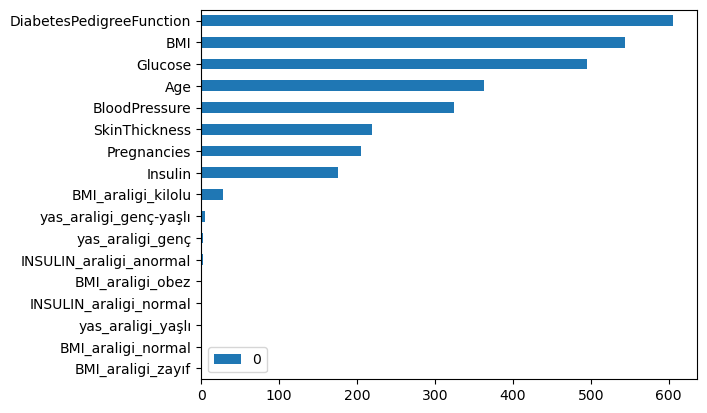

In [28]:
imp_df=pd.DataFrame(lgbm.feature_importances_,lgbm.feature_name_)
imp_df.sort_values(by=0).plot(kind="barh")

In [29]:
worst_features=["INSULIN_araligi_normal","BMI_araligi_normal","BMI_araligi_kilolu","yas_araligi_yaşlı","BMI_araligi_zayıf","INSULIN_araligi_anormal"]
new.drop(columns=worst_features,inplace=True)

In [30]:
X=new.drop(columns="Outcome")
y=new.Outcome
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2,random_state=0)
new_lgbm=LGBMClassifier()
new_lgbm.fit(X_train2,y_train2)
accuracy_score(y_test2,new_lgbm.predict(X_test2))

0.7987012987012987

### Görüldüğü üzere modele etkisi az olan değişkenler çıkarıldığında skor yaklaşık %8 düştü bu da demek oluyorki değişkenler tek başlarına bir şey ifade etmeseler de birlikte bir anlam orataya koyabiliyorlar.

## HyperParameter Tuning For LGBM

In [31]:

param_grid = {
    'boosting_type': ['gbdt', 'dart'],     # type of boosting algorithm to use
    'num_leaves': [10, 20, 30],            # maximum number of leaves in a tree
    'max_depth': [3, 5, 7],                # maximum depth of a tree
    'learning_rate': [0.1, 0.05, 0.01],    # learning rate for gradient boosting
    'n_estimators': [100, 200, 300],       # number of boosting iterations to perform
    'reg_alpha': [0.0, 0.1, 0.5],          # L1 regularization term
    'reg_lambda': [0.0, 0.1, 0.5],         # L2 regularization term
    'subsample': [0.8, 0.9, 1.0],          # fraction of samples to use for training each tree
    'colsample_bytree': [0.8, 0.9, 1.0],   # fraction of features to use for training each tree
    'min_child_samples': [20, 30, 40],     # minimum number of samples required to form a new node
}
scoring = ['recall']
random_search = RandomizedSearchCV(estimator=lgbm, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_train, y_train)
# Print grid search summary
random_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
print(f'The best hyperparameters are {random_result.best_params_}')


The best score is 0.8568
The best score standard deviation is 0.0279
The best hyperparameters are {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.0, 'num_leaves': 20, 'n_estimators': 300, 'min_child_samples': 30, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0, 'boosting_type': 'dart'}


In [32]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,yas_araligi_genç,yas_araligi_genç-yaşlı,yas_araligi_yaşlı,BMI_araligi_kilolu,BMI_araligi_normal,BMI_araligi_obez,BMI_araligi_zayıf,INSULIN_araligi_anormal,INSULIN_araligi_normal
687,1,107,50,19,30.5,28.3,0.181,29,1,0,0,1,0,0,0,0,1
500,2,117,90,19,71.0,25.2,0.313,21,1,0,0,1,0,0,0,0,1
332,1,180,72,23,30.5,43.3,0.282,41,0,1,0,0,0,1,0,0,1
979,2,174,88,37,120.0,44.5,0.646,24,1,0,0,0,0,1,0,0,1
817,0,131,88,23,30.5,31.6,0.743,32,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,173,74,23,30.5,36.8,0.088,38,1,0,0,0,0,1,0,0,1
192,7,159,66,23,30.5,30.4,0.383,36,1,0,0,0,0,1,0,0,1
629,4,94,65,22,30.5,24.7,0.148,21,1,0,0,0,1,0,0,0,1
559,11,85,74,23,30.5,30.1,0.300,35,1,0,0,0,0,1,0,0,1


In [33]:
X_train.rename(columns={"yas_araligi_genç-yaşlı":"yas_araligi_genç_yaşlı"},inplace=True)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,yas_araligi_genç,yas_araligi_genç_yaşlı,yas_araligi_yaşlı,BMI_araligi_kilolu,BMI_araligi_normal,BMI_araligi_obez,BMI_araligi_zayıf,INSULIN_araligi_anormal,INSULIN_araligi_normal
687,1,107,50,19,30.5,28.3,0.181,29,1,0,0,1,0,0,0,0,1
500,2,117,90,19,71.0,25.2,0.313,21,1,0,0,1,0,0,0,0,1
332,1,180,72,23,30.5,43.3,0.282,41,0,1,0,0,0,1,0,0,1
979,2,174,88,37,120.0,44.5,0.646,24,1,0,0,0,0,1,0,0,1
817,0,131,88,23,30.5,31.6,0.743,32,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,173,74,23,30.5,36.8,0.088,38,1,0,0,0,0,1,0,0,1
192,7,159,66,23,30.5,30.4,0.383,36,1,0,0,0,0,1,0,0,1
629,4,94,65,22,30.5,24.7,0.148,21,1,0,0,0,1,0,0,0,1
559,11,85,74,23,30.5,30.1,0.300,35,1,0,0,0,0,1,0,0,1


In [34]:
lgbm_son=LGBMClassifier(subsample=0.9,
                       reg_lambda=0.1,
                       reg_alpha=0.0,
                       num_leaves=10,
                       n_estimators=100,
                       min_child_samples=20,
                       max_depth=7,
                       learning_rate=0.1,
                       colsample_bytree=1.0,
                       boosting_type="gbdt")
lgbm_son.fit(X_train,y_train)
y_pred=lgbm_son.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

### Final skoru:0.875

In [35]:
pickle.dump(lgbm_son,open("fixed_lgbm_model_pkl","wb"))

## Zaman ayırdığınız için teşekkürler. Umarım beğenirsiniz :)